In [ ]:
import pandas as pd

df = pd.read_csv("diabetes_012_health_indicators_BRFSS2021.csv")

df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


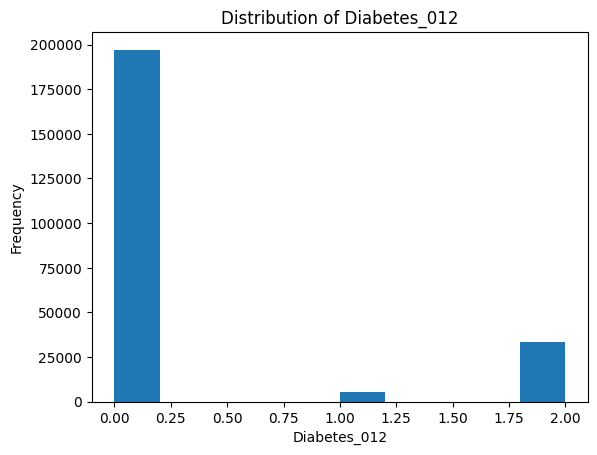

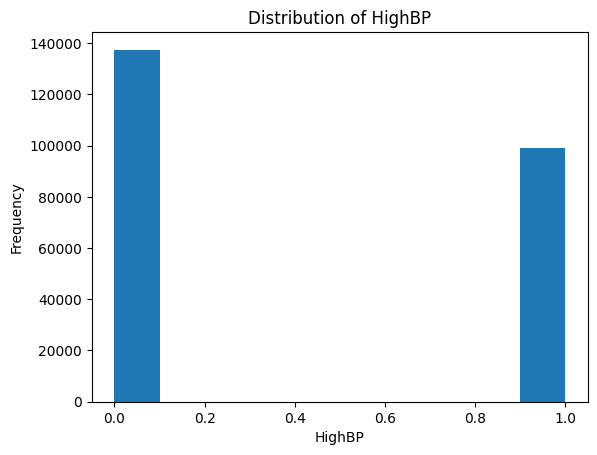

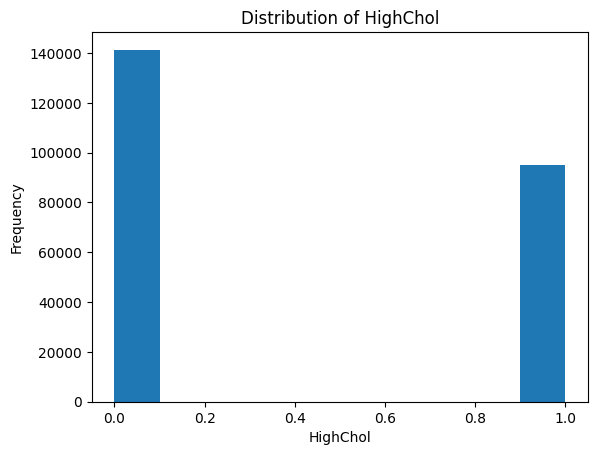

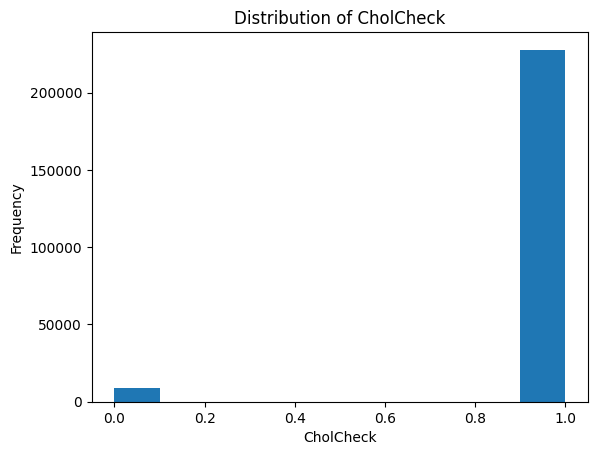

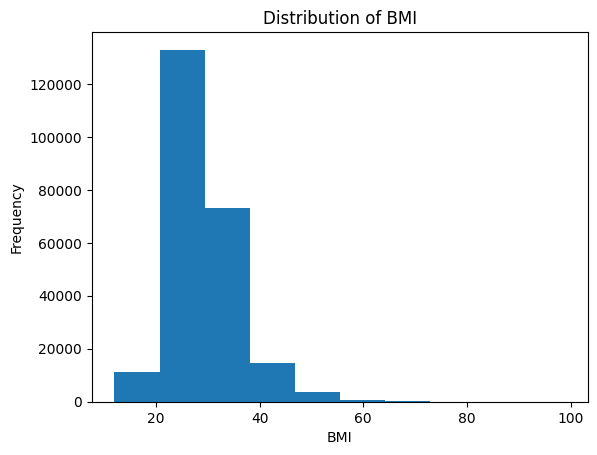

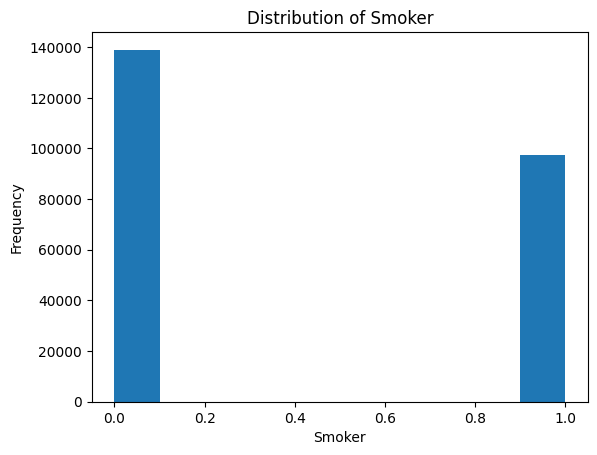

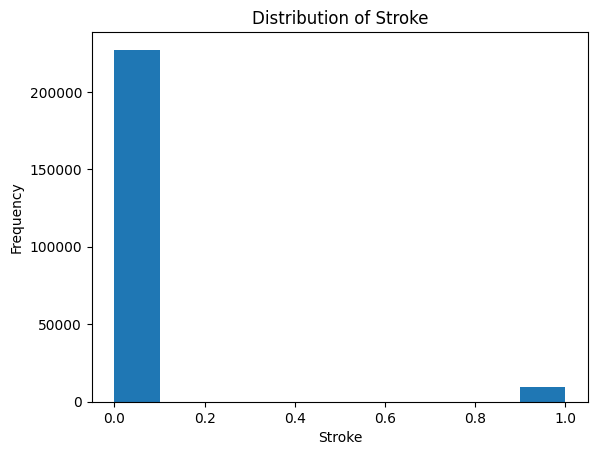

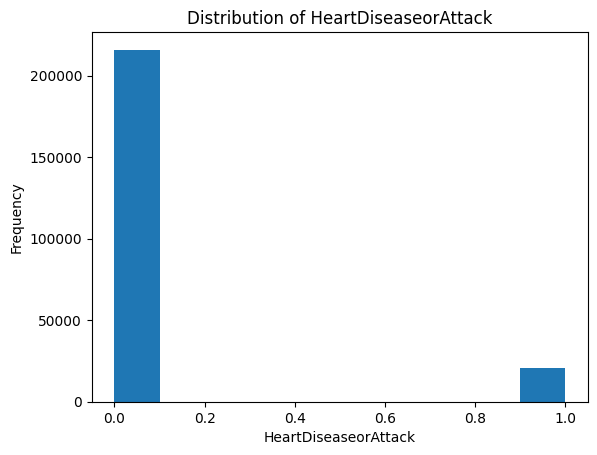

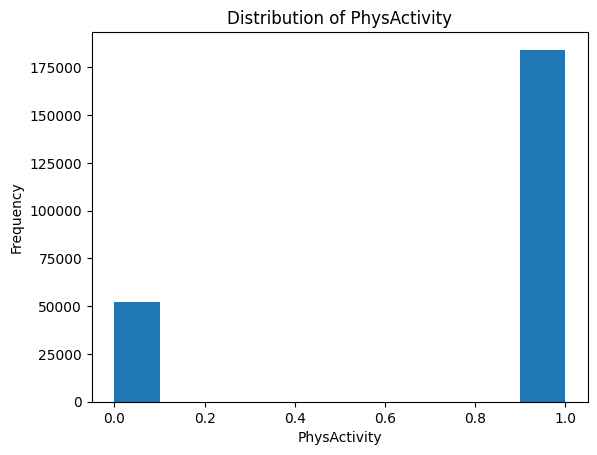

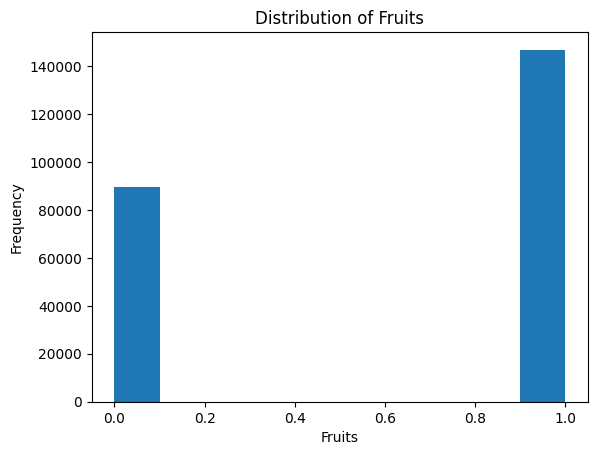

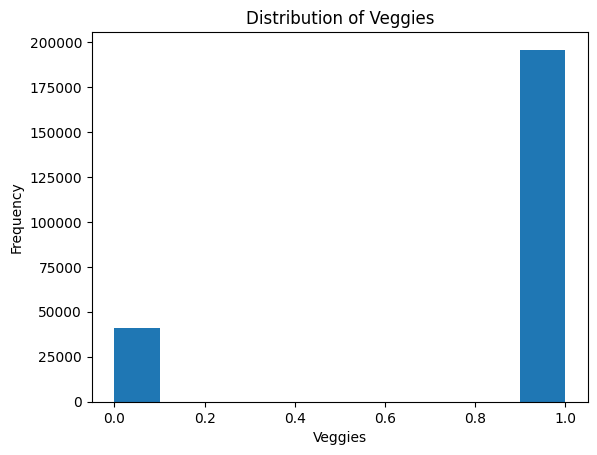

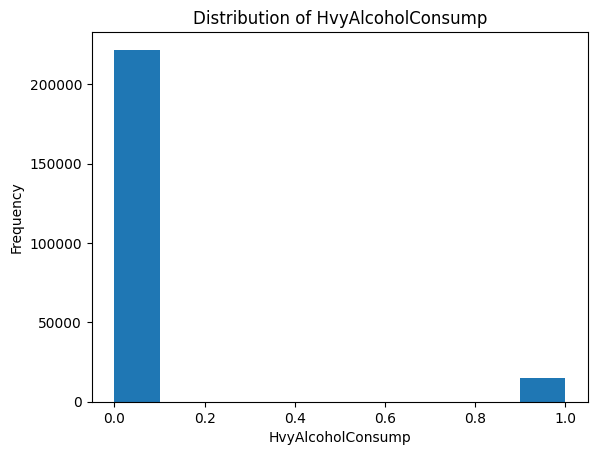

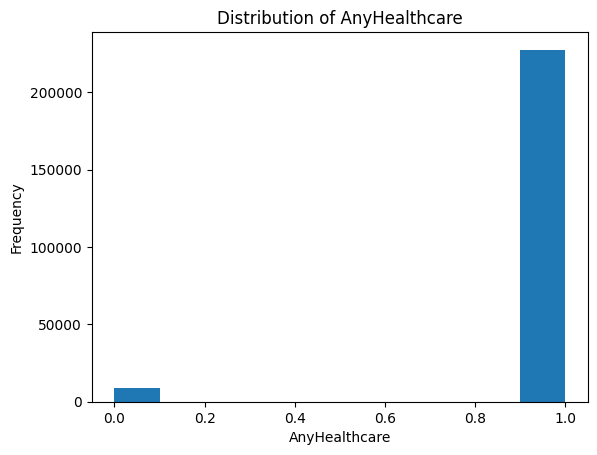

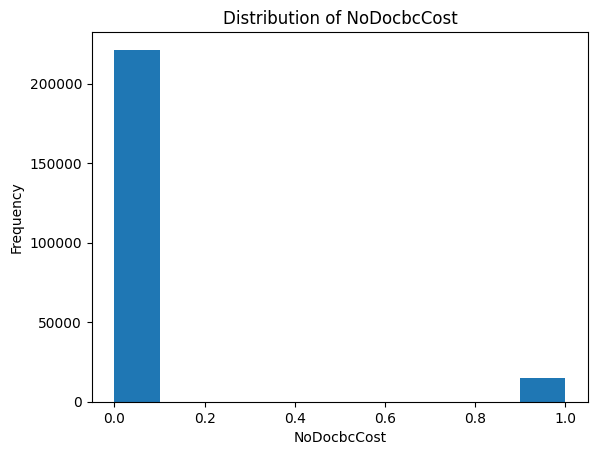

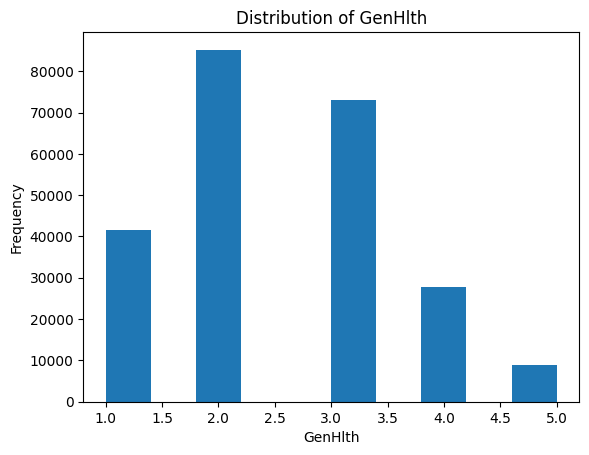

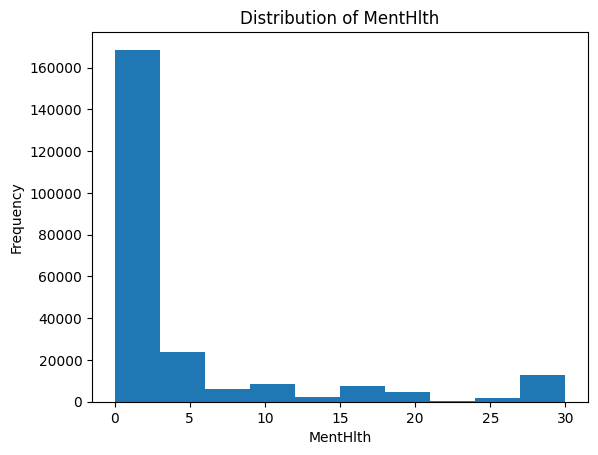

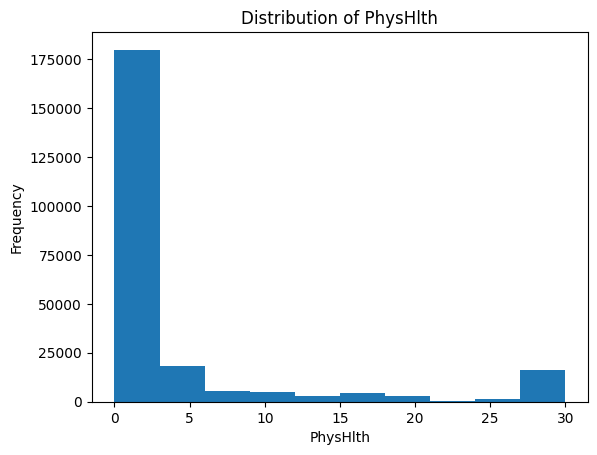

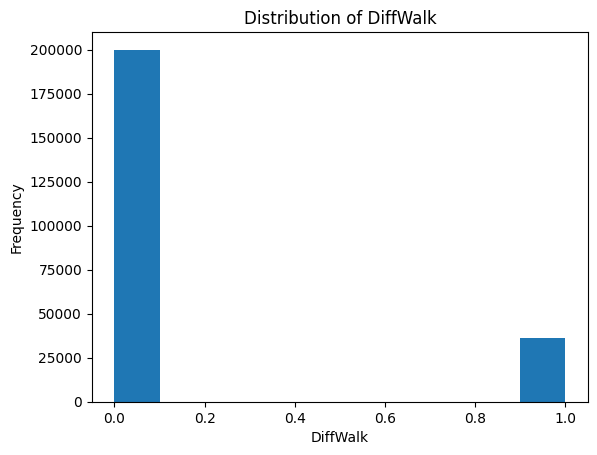

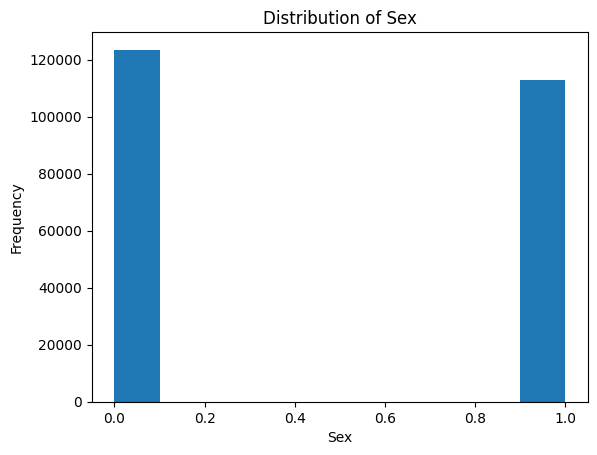

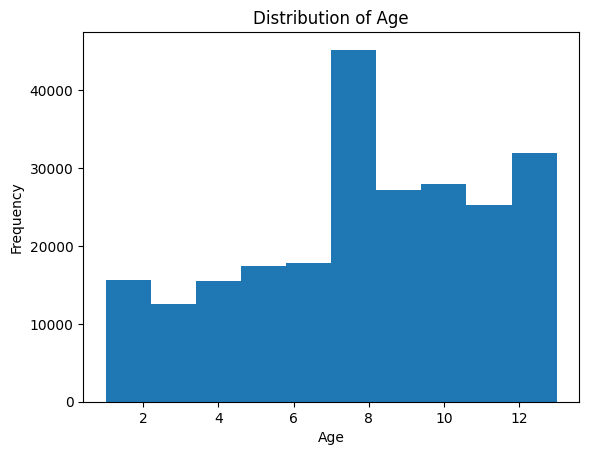

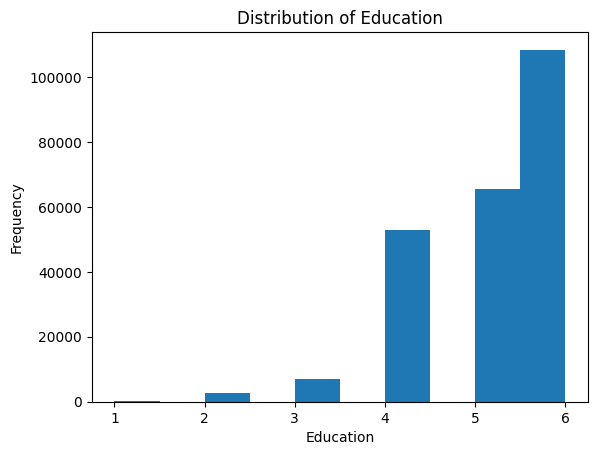

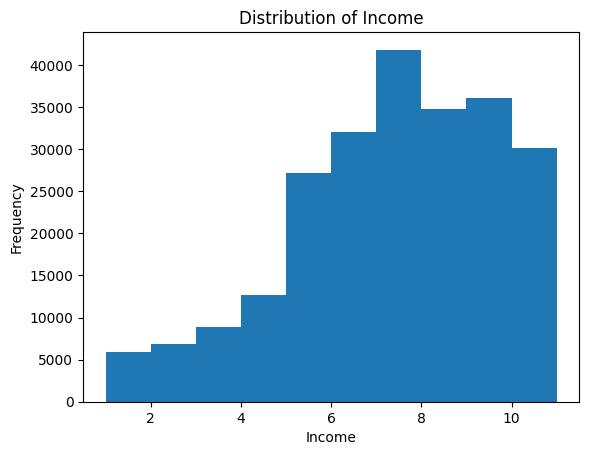

In [ ]:
import matplotlib.pyplot as plt


for column in df.columns:
    plt.figure()

    df[column].plot(kind='hist')

    plt.title(f'Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.show()

In [ ]:
df=df.drop(['Education','Income'],axis=1)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,1,0,1,0.0,5.0,10.0,20.0,0.0,0,11
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,0,0,1,0.0,2.0,0.0,0.0,0.0,0,11
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,10.0,0.0,0.0,0,9
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,1,0,1,0.0,5.0,0.0,30.0,1.0,1,12
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,0,0,1,0.0,3.0,0.0,0.0,1.0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,2.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,1,0,1,0.0,4.0,0.0,0.0,0.0,1,10
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,1,0,0,1.0,2.0,20.0,0.0,0.0,0,3
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,7
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,10


In [ ]:
from sklearn.model_selection import train_test_split

y = df['Diabetes_012']
X = df[df.columns[1:]]

xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=100)
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ", xtest.shape)
print("ytrain shape: ", ytrain.shape)
print("ytest shape: ", ytest.shape)


xtrain shape:  (189102, 19)
xtest shape:  (47276, 19)
ytrain shape:  (189102,)
ytest shape:  (47276,)


In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=1000)

reg.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
ypred = reg.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     39474
         1.0       0.00      0.00      0.00      1172
         2.0       0.53      0.18      0.26      6630

    accuracy                           0.84     47276
   macro avg       0.46      0.38      0.39     47276
weighted avg       0.79      0.84      0.80     47276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
columns = ["CholCheck", "AnyHealthcare", "NoDocbcCost", "Sex"]
df.drop(columns, axis=1)

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
0,0.0,0,1.0,15.0,1.0,0.0,0.0,0,1,1,0,5.0,10.0,20.0,0.0,11
1,2.0,1,0.0,28.0,0.0,0.0,1.0,0,1,0,0,2.0,0.0,0.0,0.0,11
2,2.0,1,1.0,33.0,0.0,0.0,0.0,1,1,1,0,2.0,10.0,0.0,0.0,9
3,2.0,0,1.0,29.0,0.0,1.0,1.0,1,1,1,0,5.0,0.0,30.0,1.0,12
4,0.0,0,0.0,24.0,1.0,0.0,0.0,0,0,0,0,3.0,0.0,0.0,1.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,2.0,1,1.0,21.0,0.0,0.0,0.0,1,1,1,0,4.0,0.0,0.0,0.0,10
236374,0.0,1,0.0,25.0,1.0,0.0,0.0,1,1,1,0,2.0,20.0,0.0,0.0,3
236375,0.0,0,1.0,31.0,0.0,0.0,0.0,1,1,1,0,2.0,0.0,0.0,0.0,7
236376,0.0,1,0.0,24.0,0.0,0.0,0.0,1,1,1,0,2.0,0.0,0.0,0.0,10


In [ ]:
from sklearn.model_selection import train_test_split

y = df['Diabetes_012']
X = df[df.columns[1:]]

xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=100)
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ", xtest.shape)
print("ytrain shape: ", ytrain.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (189102, 19)
xtest shape:  (47276, 19)
ytrain shape:  (189102,)
ytest shape:  (47276,)


In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=1000)

reg.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
ypred = reg.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     39474
         1.0       0.00      0.00      0.00      1172
         2.0       0.53      0.18      0.26      6630

    accuracy                           0.84     47276
   macro avg       0.46      0.38      0.39     47276
weighted avg       0.79      0.84      0.80     47276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
